# BOSS

### Imports

In [8]:
# some_file.py
import sys
import yaml
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/jaimerz/PhD/xCell')

from xcell.mappers import MapperBOSS
from xcell.mappers import utils
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import numpy as np

### Configurations

In [9]:
ells = [0, 30, 60, 90, 120, 150, 180, 210, 240, 272, 309, 351, 398, 452, 513, 582, 661, 750, 852, 967, 1098, 1247, 1416, 1536] #1608, 1826, 2073, 2354, 2673, 3072]
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [10]:
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [11]:
with open("../config_files/BOSS/map_CMASS.yml", 'r') as stream:
    config_CMASS = yaml.safe_load(stream)

with open("../config_files/BOSS/map_LOWZ.yml", 'r') as stream:
    config_LOWZ = yaml.safe_load(stream)

### Create maps

In [12]:
CMASS = MapperBOSS(config_CMASS)
LOWZ = MapperBOSS(config_LOWZ)

In [13]:
CMASS_map = CMASS.get_signal_map()
LOWZ_map = LOWZ.get_signal_map()

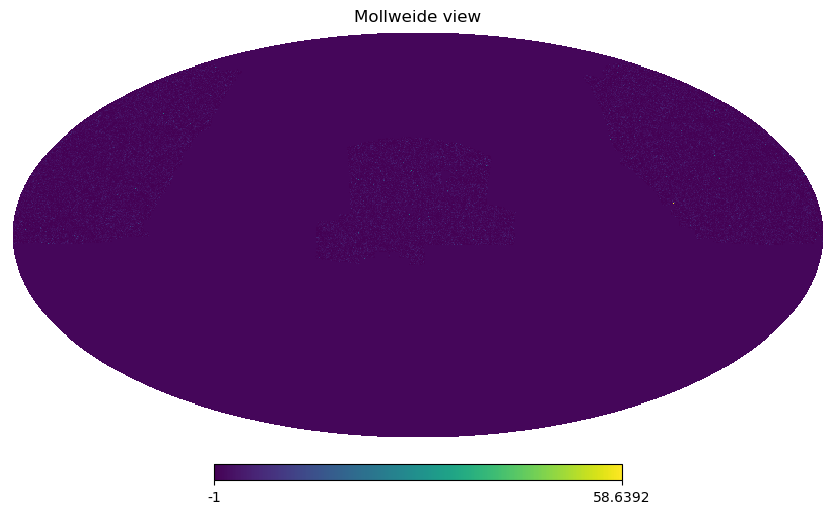

In [14]:
hp.visufunc.mollview(map=np.array(CMASS_map)[0])

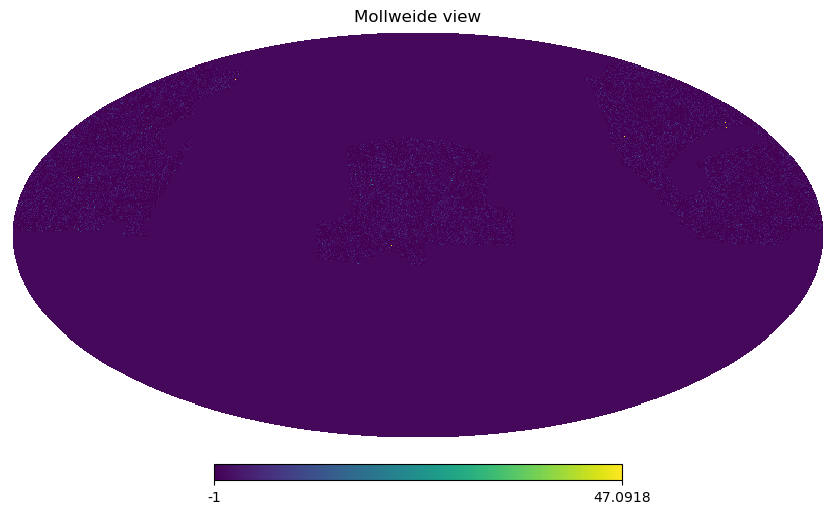

In [15]:
hp.visufunc.mollview(map=np.array(LOWZ_map)[0])

In [19]:
config_CMASS["bias"]*np.ones(config_CMASS["num_z_bins"])

array([1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93,
       1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93,
       1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93,
       1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93, 1.93,
       1.93, 1.93, 1.93, 1.93, 1.93, 1.93])

### Cl's

In [ ]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
b_ngc = 2.37*np.ones(50) 
b_sgc = 2.32 *np.ones(50) 
b_CMASS = config_CMASS["bias"]*np.ones(config_CMASS["num_z_bins"]) # https://arxiv.org/abs/1202.6057
b_LOWZ = config_LOWZ["bias"]*np.ones(config_LOWZ["num_z_bins"]) #https://arxiv.org/abs/1401.4171
b_ELG = 1.7 *np.ones(50) # 1.7 https://arxiv.org/abs/1509.05045
#ELG: 𝑏SGC = 1.310 ± 0.020 , 𝑏NGC = 1.330 ± 0.020 https://arxiv.org/pdf/2007.09012.pdf
b_LRG = 2.3*np.ones(50) # https://arxiv.org/pdf/1607.05383.pdf

In [ ]:
QSO_0_nz = QSO_0.get_nz()
QSO_1_nz = QSO_1.get_nz()
LRG_nz = LRG.get_nz()
ELG_nz = ELG.get_nz()

QSO_0_z = QSO_0_nz[0]
QSO_0_dNdz = QSO_0_nz[1]
QSO_1_z = QSO_1_nz[0]
QSO_1_dNdz = QSO_1_nz[1]
LRG_z = LRG_nz[0]
LRG_dNdz = LRG_nz[1]
ELG_z = ELG_nz[0]
ELG_dNdz = ELG_nz[1]

In [ ]:
QSOt_0 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(QSO_0_z, QSO_0_dNdz), bias=(QSO_0_z, b_ngc))
QSOt_1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(QSO_1_z, QSO_1_dNdz), bias=(QSO_1_z, b_ngc))
#CMASSt = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(CMASS_z, CMASS_dNdz), bias=(CMASS_z, b_CMASS))
#LOWZt = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(LOWZ_z, LOWZ_dNdz), bias=(LOWZ_z, b_LOWZ))
ELGt = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(ELG_z, ELG_dNdz), bias=(ELG_z, b_ELG))
LRGt = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(LRG_z, LRG_dNdz), bias=(LRG_z, b_LRG))

In [ ]:
plt.plot(ELG_z, ELG_dNdz, label='ELG')
plt.plot(LRG_z, LRG_dNdz, label='LRG')
plt.plot(QSO_0_z, QSO_0_dNdz, label='QSO_0')
plt.plot(QSO_1_z, QSO_1_dNdz, label='QSO_1')
plt.legend()
plt.show()

In [ ]:
#ell = np.arange(2, 2000)
QSOt_cl_00 = ccl.angular_cl(cosmo, QSOt_0, QSOt_0, ell_arr) 
QSOt_cl_11 = ccl.angular_cl(cosmo, QSOt_1, QSOt_1, ell_arr) 
#CMASSt_cl = ccl.angular_cl(cosmo, CMASSt, CMASSt, ell_arr) 
#LOWZt_cl = ccl.angular_cl(cosmo, LOWZt, LOWZt, ell_arr) 
ELGt_cl = ccl.angular_cl(cosmo, ELGt, ELGt, ell_arr) 
LRGt_cl = ccl.angular_cl(cosmo, LRGt, LRGt, ell_arr) 

In [ ]:
QSO_f_0 =  QSO_0.get_nmt_field()
QSO_f_1 =  QSO_1.get_nmt_field()

In [ ]:
#CMASS_f =  CMASS.get_nmt_field()
#LOWZ_f =  LOWZ.get_nmt_field()

In [ ]:
ELG_f =  ELG.get_nmt_field()
LRG_f =  LRG.get_nmt_field()

In [ ]:
QSO_w_00 = nmt.NmtWorkspace()
QSO_w_00.compute_coupling_matrix(QSO_f_0, QSO_f_0, bands)

QSO_w_11 = nmt.NmtWorkspace()
QSO_w_11.compute_coupling_matrix(QSO_f_1, QSO_f_1, bands)

In [ ]:
#CMASS_w = nmt.NmtWorkspace()
#CMASS_w.compute_coupling_matrix(CMASS_f, CMASS_f, bands)
#LOWZ_w = nmt.NmtWorkspace()
#LOWZ_w.compute_coupling_matrix(LOWZ_f, LOWZ_f, bands)

In [ ]:
ELG_w = nmt.NmtWorkspace()
ELG_w.compute_coupling_matrix(ELG_f, ELG_f, bands)

LRG_w = nmt.NmtWorkspace()
LRG_w.compute_coupling_matrix(LRG_f, LRG_f, bands)

In [ ]:
QSO_cl_c_00 = nmt.compute_coupled_cell(QSO_f_0, QSO_f_0)
QSO_cl_c_11 = nmt.compute_coupled_cell(QSO_f_1, QSO_f_1)
#CMASS_cl_c = nmt.compute_coupled_cell(CMASS_f, CMASS_f)
#LOWZ_cl_c = nmt.compute_coupled_cell(LOWZ_f, LOWZ_f)
ELG_cl_c = nmt.compute_coupled_cell(ELG_f, ELG_f)
LRG_cl_c = nmt.compute_coupled_cell(LRG_f, LRG_f)

In [ ]:
QSO_cl_00 = QSO_w_00.decouple_cell(QSO_cl_c_00)
QSO_cl_11 = QSO_w_11.decouple_cell(QSO_cl_c_11)
#CMASS_cl = CMASS_w.decouple_cell(CMASS_cl_c)
#LOWZ_cl = LOWZ_w.decouple_cell(LOWZ_cl_c)
ELG_cl = ELG_w.decouple_cell(ELG_cl_c)
LRG_cl = LRG_w.decouple_cell(LRG_cl_c)

In [ ]:
QSO_nl_c_00 = QSO_0.get_nl_coupled() 
QSO_nl_c_11 = QSO_1.get_nl_coupled() 
#CMASS_nl_c = CMASS.get_nl_coupled() 
#LOWZ_nl_c = LOWZ.get_nl_coupled() 
ELG_nl_c = ELG.get_nl_coupled() 
LRG_nl_c = LRG.get_nl_coupled() 

In [ ]:
QSO_nl_00 = QSO_w_00.decouple_cell(QSO_nl_c_00)
QSO_nl_11 = QSO_w_11.decouple_cell(QSO_nl_c_11)
#CMASS_nl = CMASS_w.decouple_cell(CMASS_nl_c)
#LOWZ_nl = LOWZ_w.decouple_cell(LOWZ_nl_c)
ELG_nl = ELG_w.decouple_cell(ELG_nl_c)
LRG_nl = LRG_w.decouple_cell(LRG_nl_c)

In [ ]:
plt.plot(ell_arr, QSO_cl_00[0]-QSO_nl_00[0], 'o-', label='data')
plt.plot(ell_arr, QSOt_cl_00, 'o-', label='theory')
plt.title('Quasars density angular NGC 00')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
plt.plot(QSO_cl_11[0]-QSO_nl_11[0], 'o-', label='data')
plt.plot(QSOt_cl_11, 'o-', label='theory')
plt.title('Quasars density angular NGC 11')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
plt.plot(LOWZ_cl[0]-LOWZ_nl[0], 'o-', label='data')
plt.plot(LOWZt_cl, 'o-', label='theory')
plt.title('LOWZ density angular')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(CMASS_cl[0]-CMASS_nl[0], 'o-', label='data')
plt.plot(CMASSt_cl, 'o-', label='theory')
plt.title('CMASS density angular')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(ell_arr, LRG_cl[0]-LRG_nl[0], 'o-', label='data')
plt.plot(ell_arr, LRGt_cl, 'o-', label='theory')
plt.title('LRG density angular')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
plt.plot(ell_arr, ELG_cl[0]-ELG_nl[0], 'o-', label='data')
plt.plot(ell_arr, ELGt_cl, 'o-', label='theory')
plt.title('ELG density angular')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.xscale('log')
plt.yscale('log')
plt.show()